In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier, plot_importance
import shap


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
alias_nombres = {
    "Sinner J.": "Jannik Sinner",
    "Zverev A.": "Alexander Zverev",
    "Alcaraz C.": "Carlos Alcaraz",
    "Fritz T.": "Taylor Fritz",
    "Draper J.": "Jack Draper",
    "Djokovic N.": "Novak Djokovic",
    "Ruud C.": "Casper Ruud",
    "De Minaur A.": "Alex De Minaur",
    "Musetti L.": "Lorenzo Musetti",
    "Rune H.": "Holger Rune",
    "Medvedev D.": "Daniil Medvedev",
    "Paul T.": "Tommy Paul",
    "Shelton B.": "Ben Shelton",
    "Fils A.": "Arthur Fils",
    "Dimitrov G.": "Grigor Dimitrov",
    "Tiafoe F.": "Frances Tiafoe",
    "Rublev A.": "Andrey Rublev",
    "Cerundolo F.": "Francisco Cerundolo",
    "Tsitsipas S.": "Stefanos Tsitsipas",
    "Machac T.": "Tomas Machac",
    "Mensik J.": "Jakub Mensik",
    "Humbert U.": "Ugo Humbert",
    "Korda S.": "Sebastian Korda",
    "Khachanov K.": "Karen Khachanov",
    "Popyrin A.": "Alexei Popyrin",
    "Davidovich Fokina A.": "Alejandro Davidovich Fokina",
    "Auger-Aliassime F.": "Felix Auger Aliassime",
    "Shapovalov D.": "Denis Shapovalov",
    "Nakashima B.": "Brandon Nakashima",
    "Berrettini M.": "Matteo Berrettini",
    "Hurkacz H.": "Hubert Hurkacz",
    "Michelsen A.": "Alex Michelsen",
    "Baez S.": "Sebastian Baez",
    "Cobolli F.": "Flavio Cobolli",
    "Griekspoor T.": "Tallon Griekspoor",
    "Mpetshi Perricard G.": "Giovanni Mpetshi Perricard",
    "Arnaldi M.": "Matteo Arnaldi",
    "Lehecka J.": "Jiri Lehecka",
    "Muller A.": "Alexandre Muller",
    "Borges N.": "Nuno Borges",
    "Thompson J.": "Jordan Thompson",
    "Tabilo A.": "Alejandro Tabilo",
    "Monfils G.": "Gael Monfils",
    "Sonego L.": "Lorenzo Sonego",
    "Giron M.": "Marcos Giron",
    "Darderi L.": "Luciano Darderi",
    "Kecmanovic M.": "Miomir Kecmanovic",
    "Goffin D.": "David Goffin",
    "Martinez P.": "Pedro Martinez",
    "Bergs Z.": "Zizou Bergs",
    "Etcheverry T.": "Tomas Martin Etcheverry",
    "Halys Q.": "Quentin Halys",
    "Jarry N.": "Nicolas Jarry",
    "Diallo G.": "Gabriel Diallo",
    "Zhang Z.": "Zhizhen Zhang",
    "Bautista Agut R.": "Roberto Bautista Agut",
    "Fearnley J.": "Jacob Fearnley",
    "Bonzi B.": "Benjamin Bonzi",
    "Carballes Baena R.": "Roberto Carballes Baena",
    "Ugo Carabelli C.": "Camilo Ugo Carabelli",
    "Marozsan F.": "Fabian Marozsan",
    "Nishikori K.": "Kei Nishikori",
    "Comesana F.": "Francisco Comesana",
    "Djere L.": "Laslo Djere",
    "Fonseca J.": "Joao Fonseca",
    "Munar J.": "Jaume Munar",
    "Shang J.": "Juncheng Shang",
    "Bellucci M.": "Mattia Bellucci",
    "Dzumhur D.": "Damir Dzumhur",
    "Tien L.": "Learner Tien",
    "Altmaier D.": "Daniel Altmaier",
    "Medjedovic H.": "Hamad Medjedovic",
    "Yunchaokete B.": "Bu Yunchaokete",
    "Nishioka Y.": "Yoshihito Nishioka",
    "Rinderknech A.": "Arthur Rinderknech",
    "Bublik A.": "Alexander Bublik",
    "Safiullin R.": "Roman Safiullin",
    "Gaston H.": "Hugo Gaston",
    "Vukic A.": "Aleksandar Vukic",
    "Kovacevic A.": "Aleksandar Kovacevic",
    "Oconnell C.": "Christopher Oconnell",
    "Hijikata R.": "Rinky Hijikata",
    "Moutet C.": "Corentin Moutet",
    "Coric B.": "Borna Coric",
    "Van De Zandschulp B.": "Botic Van De Zandschulp",
    "Collignon R.": "Raphael Collignon",
    "Struff J.L.": "Jan Lennard Struff",
    "Walton A.": "Adam Walton",
    "Majchrzak K.": "Kamil Majchrzak",
    "Duckworth J.": "James Duckworth",
    "Norrie C.": "Cameron Norrie",
    "Kopriva V.": "Vit Kopriva",
    "De Jong J.": "Jesper De Jong",
    "Opelka R.": "Reilly Opelka",
    "Nardi L.": "Luca Nardi",
    "Mcdonald M.": "Mackenzie Mcdonald",
    "Shevchenko A.": "Alexander Shevchenko",
    "Carreno Busta P.": "Pablo Carreno Busta",
    "Navone M.": "Mariano Navone",
    "Basavareddy N.": "Nishesh Basavareddy"
}

In [9]:

# === Paso 1: Cargar datasets ===
df_partidos = pd.read_csv("dataset_3hard_10partidos.csv", delimiter=';')
df_stats = pd.read_csv("Estadisticas_2024_limpio/stats_Hard.csv")

# Limpiar nombres
df_stats['Player'] = df_stats['Player'].str.strip()
df_partidos['Local'] = df_partidos['Local'].str.strip()
df_partidos['Visitante'] = df_partidos['Visitante'].str.strip()


# Reemplazar nombres en el dataset de partidos
df_partidos['Local'] = df_partidos['Local'].replace(alias_nombres)
df_partidos['Visitante'] = df_partidos['Visitante'].replace(alias_nombres)

# === Paso 3: Merge jugador local ===
df_local = df_partidos.merge(df_stats, how='left', left_on='Local', right_on='Player', suffixes=('', '_local'))
df_local = df_local.drop(columns=['Player'])

local_stat_cols = [col for col in df_local.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L']]
df_local = df_local.rename(columns={col: f'1_{col}' for col in local_stat_cols})

# === Paso 4: Merge jugador visitante ===
df_final = df_local.merge(df_stats, how='left', left_on='Visitante', right_on='Player', suffixes=('', '_visit'))
df_final = df_final.drop(columns=['Player'])

visit_stat_cols = [col for col in df_final.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L'] and not col.startswith('1_')]
df_final = df_final.rename(columns={col: f'2_{col}' for col in visit_stat_cols})

In [13]:
# === Paso 5: Reordenar columnas respetando orden original del CSV
stats_cols = [col for col in df_stats.columns if col not in ['Player', 'Rk']]
columnas_finales = ['Surface', 'Local', 'Visitante', 'W_OR_L'] + \
                   [f'1_{col}' for col in stats_cols if f'1_{col}' in df_final.columns] + \
                   [f'2_{col}' for col in stats_cols if f'2_{col}' in df_final.columns]

df_final = df_final[columnas_finales]

# === Paso 6: Guardar el dataset final
df_final.to_csv("dataset_modelo1_10partidos.csv", index=False)
print("Dataset preparado para entrenamiento de modelo.")

Dataset preparado para entrenamiento de modelo.


In [ ]:

# === Cargar el dataset ===
df = pd.read_csv("dataset_modelo1_10partidos.csv")

# === Eliminar columnas que no queremos usar (nombres de jugadores) ===
X = df.drop(columns=['W_OR_L', 'Local', 'Visitante', 'Surface'])
y = df['W_OR_L']


# === Separar entrenamiento y test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Crear y entrenar el modelo ===
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# === Predicciones y evaluación ===
y_pred = model1.predict(X_test)

print("=== Evaluación en Test ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Evaluación en Test ===
Accuracy: 0.6939
F1 Score: 0.7692
Confusion Matrix:
 [[ 9  9]
 [ 6 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.50      0.55        18
           1       0.74      0.81      0.77        31

    accuracy                           0.69        49
   macro avg       0.67      0.65      0.66        49
weighted avg       0.69      0.69      0.69        49



In [21]:
# Importancia de variables
rf_importances = pd.Series(model1.feature_importances_, index=X.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', None)  # Muestra todas las filas
print("\n=== Importancia de Variables ===")
print(rf_importances)


=== Importancia de Variables ===
1_BPConv%    0.029073
1_S W%       0.027762
1_M          0.026883
2_vAce%      0.026669
2_Bks/S      0.025602
2_Bks/M      0.023782
2_RPW        0.022050
2_M W%       0.021234
1_vAce%      0.019978
2_G W%       0.019728
1_Brk%       0.019413
2_Brk%       0.019151
1_TB W%      0.018677
1_G W%       0.018462
2_BPSvd%     0.018161
2_v2nd%      0.017783
1_M W%       0.017691
2_Hld%       0.017621
2_S W%       0.017470
1_TPW%       0.017126
2_BPConv%    0.016069
1_Bks/M      0.015867
1_BPChnc     0.015832
2_BPChnc     0.015739
2_v1st%      0.015702
2_TB W%      0.015475
1_vDF%       0.015234
2_DF/2s      0.014984
2_Bkn/S      0.014795
2_2%-InP     0.014677
2_2nd%       0.014319
2_BPvs/M     0.014319
1_2nd%       0.013971
1_BP/M       0.013753
2_1st%       0.013614
1_Ace%       0.013569
2_BPvs/S     0.013497
1_RPW        0.013467
2_DF%        0.013359
1_v1st%      0.013136
2_BPvs/G     0.013027
1_1stIn      0.013022
2_1stIn      0.012956
2_Bkn/M      0.01293

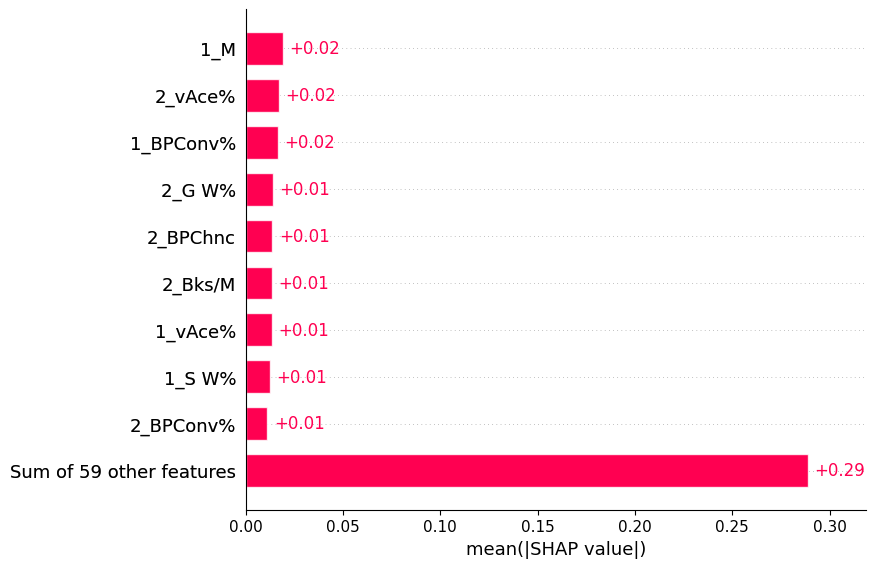

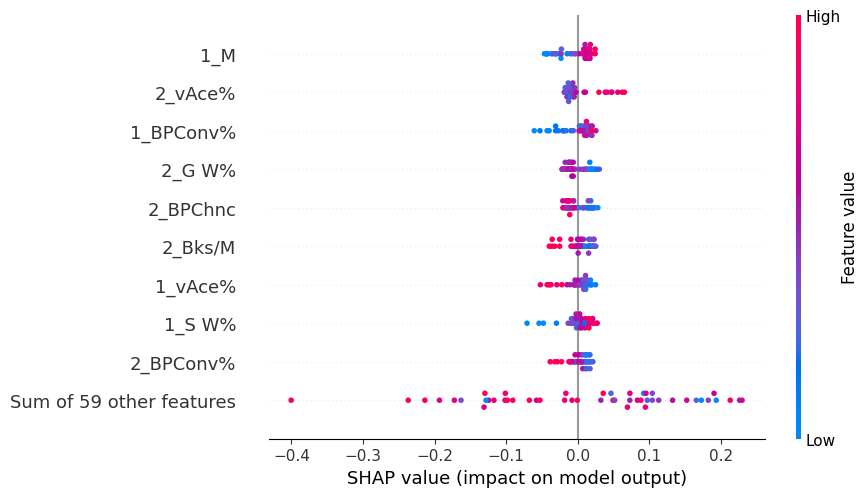

In [16]:

# === Crear el explainer con el modelo y los datos de entrenamiento ===
explainer = shap.Explainer(model1, X_train)

# === Calcular los valores SHAP con chequeo desactivado ===
shap_values = explainer(X_test, check_additivity=False)

# === Extraer los valores SHAP de la clase 1 (victoria) ===
if len(shap_values.values.shape) == 3:
    # Para clasificación binaria con varias clases (forma [samples, features, classes])
    shap_values_class1 = shap.Explanation(
        values=shap_values.values[:, :, 1],
        base_values=shap_values.base_values[:, 1],
        data=shap_values.data,
        feature_names=shap_values.feature_names
    )
else:
    # Para casos en que shap_values ya es de forma [samples, features]
    shap_values_class1 = shap_values

# === Visualización de importancia global ===
shap.plots.bar(shap_values_class1)       # Importancia media absoluta por variable
shap.plots.beeswarm(shap_values_class1)  # Distribución por variable en cada muestra


In [24]:
# === Paso 5: Reordenar columnas respetando orden original del CSV
stats_cols = [col for col in df_stats.columns if col not in ['Player', 'Rk', 'BPvs/S', 'Bkn/M','BP/S', 'BP/G', 'M']]
columnas_finales = ['Surface', 'Local', 'Visitante', 'W_OR_L'] + \
                   [f'1_{col}' for col in stats_cols if f'1_{col}' in df_final.columns] + \
                   [f'2_{col}' for col in stats_cols if f'2_{col}' in df_final.columns]

df_final = df_final[columnas_finales]

# === Paso 6: Guardar el dataset final
df_final.to_csv("dataset_modelo2_10partidos.csv", index=False)
print("Dataset preparado para entrenamiento de modelo.")

Dataset preparado para entrenamiento de modelo.


In [25]:
# === Cargar el dataset ===
df = pd.read_csv("dataset_modelo2_10partidos.csv")

# === Eliminar columnas que no queremos usar (nombres de jugadores) ===
X = df.drop(columns=['W_OR_L', 'Local', 'Visitante', 'Surface'])
y = df['W_OR_L']


# === Separar entrenamiento y test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Crear y entrenar el modelo ===
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

# === Predicciones y evaluación ===
y_pred = model2.predict(X_test)

print("=== Evaluación en Test ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Evaluación en Test ===
Accuracy: 0.6735
F1 Score: 0.7576
Confusion Matrix:
 [[ 8 10]
 [ 6 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.44      0.50        18
           1       0.71      0.81      0.76        31

    accuracy                           0.67        49
   macro avg       0.64      0.63      0.63        49
weighted avg       0.66      0.67      0.66        49



No mejora quitando las menos importantes

Top 20 variables más importantes según SHAP:
 ['1_M', '2_vAce%', '1_BPConv%', '2_G W%', '2_BPChnc', '2_Bks/M', '1_vAce%', '1_S W%', '2_BPConv%', '2_v2nd%', '2_RPW', '2_Bks/S', '2_S W%', '1_G W%', '1_TB W%', '1_Bks/M', '1_BPChnc', '2_Hld%', '1_RPW', '2_Brk%']

=== Evaluación del modelo reducido ===
Accuracy: 0.6531
F1 Score: 0.7385
Confusion Matrix:
 [[ 8 10]
 [ 7 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.44      0.48        18
           1       0.71      0.77      0.74        31

    accuracy                           0.65        49
   macro avg       0.62      0.61      0.61        49
weighted avg       0.64      0.65      0.65        49



<Figure size 640x480 with 0 Axes>

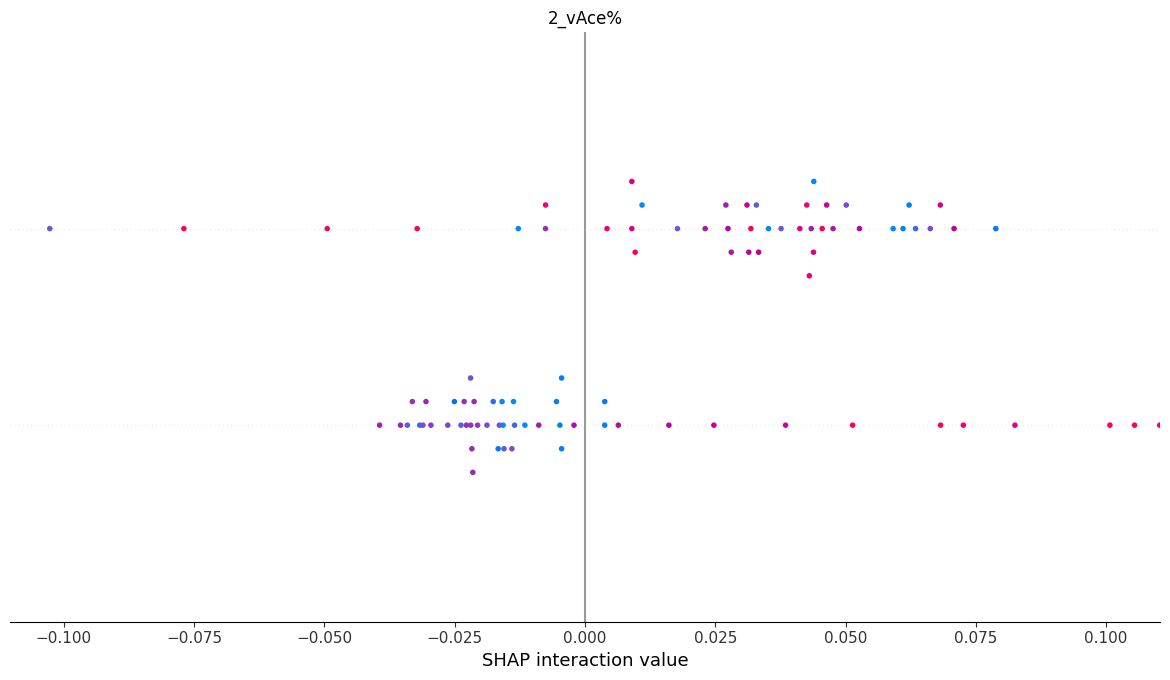

<Figure size 640x480 with 0 Axes>

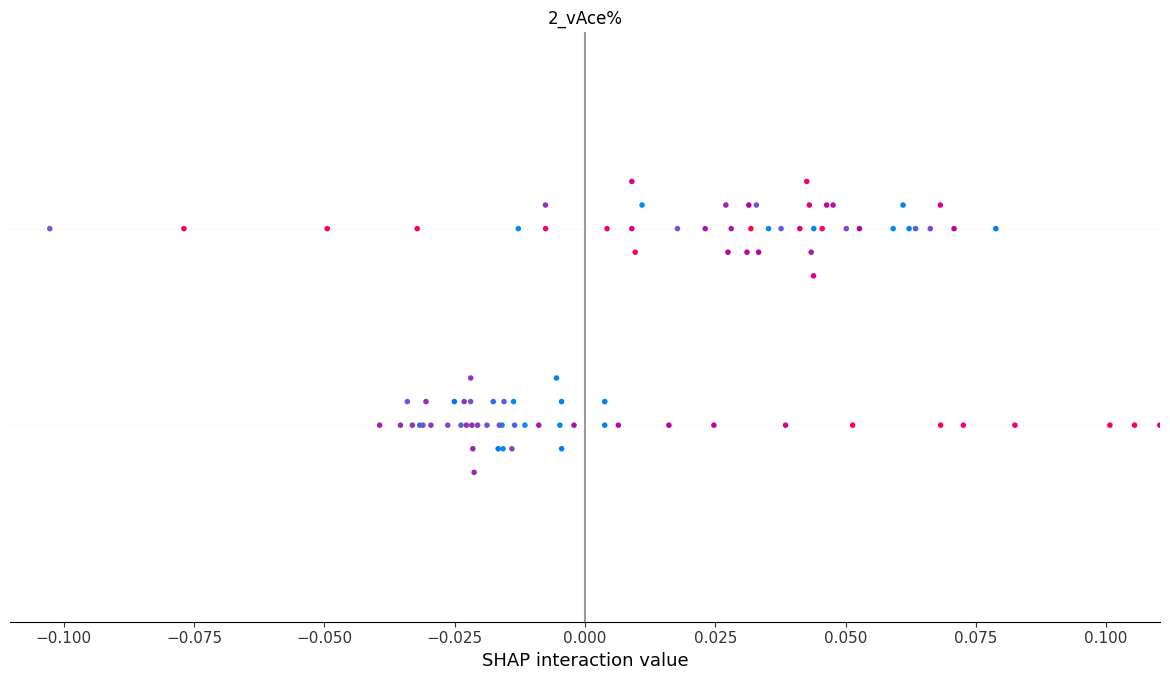

In [19]:


# === Cargar datos originales ===
df = pd.read_csv("dataset_modelo1_10partidos.csv")
X = df.drop(columns=['W_OR_L', 'Local', 'Visitante', 'Surface'])
y = df['W_OR_L']

# === Separar en entrenamiento y test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Entrenar primer modelo completo para análisis SHAP ===
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# === Obtener valores SHAP ===
explainer = shap.Explainer(model1, X_train)
shap_values = explainer(X_test, check_additivity=False)

# === Extraer valores SHAP para clase 1 ===
if len(shap_values.values.shape) == 3:
    shap_values_class1 = shap.Explanation(
        values=shap_values.values[:, :, 1],
        base_values=shap_values.base_values[:, 1],
        data=shap_values.data,
        feature_names=shap_values.feature_names
    )
else:
    shap_values_class1 = shap_values

# === Selección automática de variables importantes ===
top_n = 20  # puedes cambiar este valor
mean_abs_shap = np.abs(shap_values_class1.values).mean(axis=0)
importancia_df = pd.DataFrame({
    'feature': shap_values_class1.feature_names,
    'mean_abs_shap': mean_abs_shap
}).sort_values(by='mean_abs_shap', ascending=False)

top_features = importancia_df['feature'].head(top_n).tolist()
print(f"Top {top_n} variables más importantes según SHAP:\n", top_features)

# === Filtrar dataset con solo las top N variables ===
X_train_reducido = X_train[top_features]
X_test_reducido = X_test[top_features]

# === Entrenar nuevo modelo con menos variables ===
model_reducido = RandomForestClassifier(n_estimators=100, random_state=42)
model_reducido.fit(X_train_reducido, y_train)

# === Evaluación del nuevo modelo ===
y_pred = model_reducido.predict(X_test_reducido)
print("\n=== Evaluación del modelo reducido ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === SHAP del nuevo modelo reducido ===
explainer_reducido = shap.Explainer(model_reducido, X_train_reducido)
shap_values_reducido = explainer_reducido(X_test_reducido, check_additivity=False)

# === Visualización SHAP ===
# === Visualización SHAP con métodos robustos ===
shap.summary_plot(shap_values_reducido, X_test_reducido, plot_type="bar")
shap.summary_plot(shap_values_reducido, X_test_reducido)



In [26]:
# === Paso 5: Reordenar columnas respetando orden original del CSV
stats_cols = [col for col in df_stats.columns if col not in ['Player', 'Rk', 'DF','1stIn', '2%-InP', 'BPChnc', 'BP/G','BP/S', 'Bks/S', 'Bks/M', 'BPvs/G', 'BPvs/S', 'Bkn/S', 'G W%']]
columnas_finales = ['Surface', 'Local', 'Visitante', 'W_OR_L'] + \
                   [f'1_{col}' for col in stats_cols if f'1_{col}' in df_final.columns] + \
                   [f'2_{col}' for col in stats_cols if f'2_{col}' in df_final.columns]

df_final = df_final[columnas_finales]

# === Paso 6: Guardar el dataset final
df_final.to_csv("dataset_modelo10_10partidos.csv", index=False)
print("Dataset preparado para entrenamiento de modelo.")

Dataset preparado para entrenamiento de modelo.


In [27]:

# === Cargar el dataset ===
df = pd.read_csv("dataset_modelo1_10partidos.csv")

# === Eliminar columnas que no queremos usar (nombres de jugadores) ===
X = df.drop(columns=['W_OR_L', 'Local', 'Visitante', 'Surface'])
y = df['W_OR_L']


# === Separar entrenamiento y test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Crear y entrenar el modelo ===
model1 = RandomForestClassifier(n_estimators=100, class_weight='balanced',random_state=42)
model1.fit(X_train, y_train)

# === Predicciones y evaluación ===
y_pred = model1.predict(X_test)

print("=== Evaluación en Test ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Evaluación en Test ===
Accuracy: 0.6939
F1 Score: 0.7761
Confusion Matrix:
 [[ 8 10]
 [ 5 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.44      0.52        18
           1       0.72      0.84      0.78        31

    accuracy                           0.69        49
   macro avg       0.67      0.64      0.65        49
weighted avg       0.68      0.69      0.68        49

